Выберите ряд из первого задания и постройте его модель ARIMA/GARCH. Отчет нужно будет оформить в jupyter-ноутбук.
Дополнительное задание: попробуйте спрогнозировать график классическим ML.

In [10]:
import pandas as pd
import numpy as np
import tqdm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from math import sqrt

In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

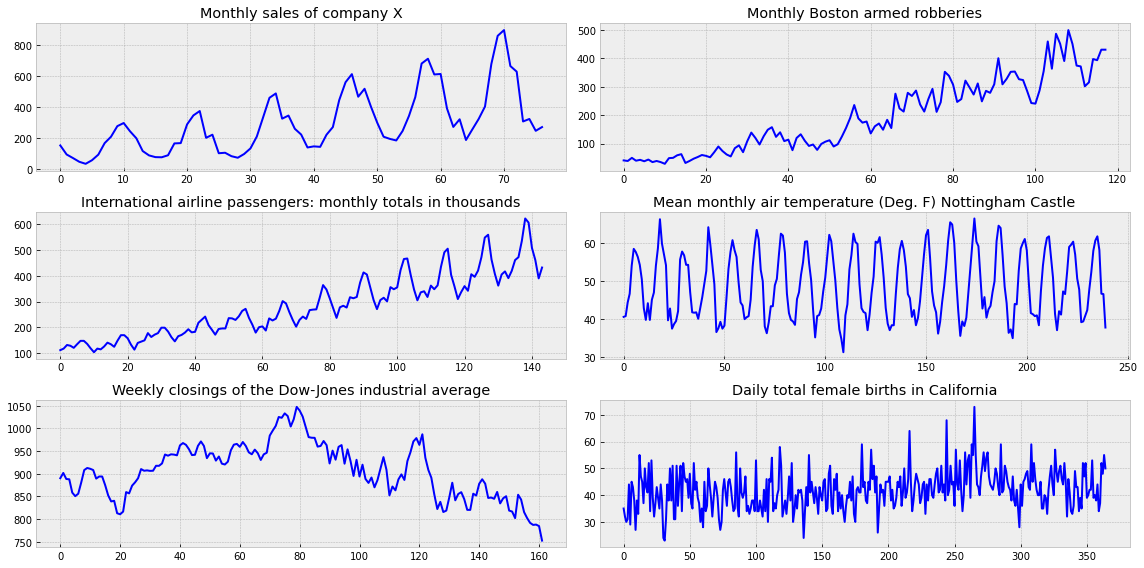

In [15]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

In [23]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [24]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (5, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))
        qq_ax = plt.subplot2grid(layout, (4, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        
        plt.tight_layout()
    return

In [32]:
series = dowjones_closing['Close']

In [33]:
series = boxcox(series, 0)

In [34]:
series = series[1:] - series[:-1]

In [35]:
series = series[12:] - series[:-12]

In [36]:
# series

Results of Dickey-Fuller Test:
Test Statistic                  -3.433413
p-value                          0.009871
#Lags Used                      14.000000
Number of Observations Used    134.000000
Critical Value (1%)             -3.480119
Critical Value (5%)             -2.883362
Critical Value (10%)            -2.578407
dtype: float64


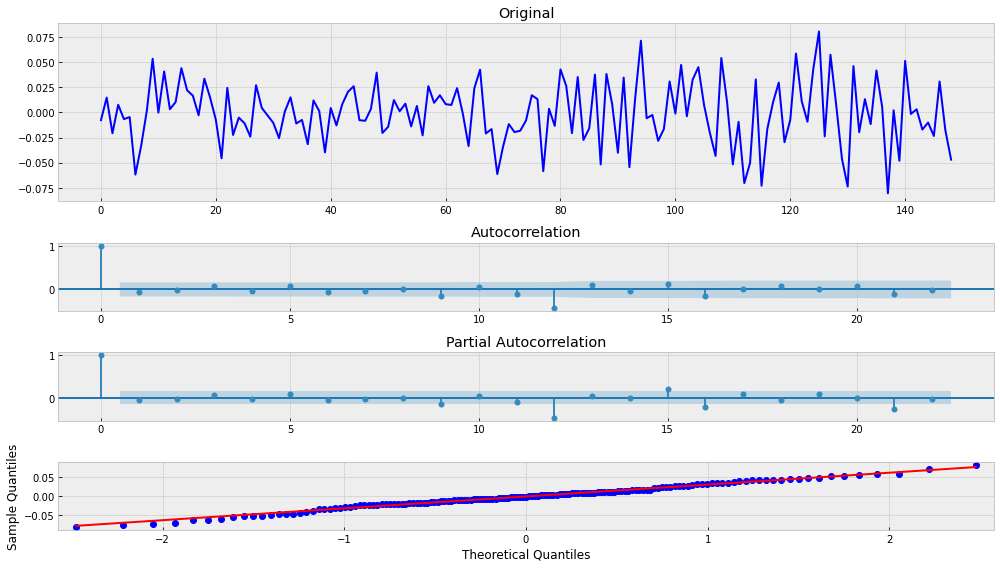

In [37]:
tsplot(series)

ARIMA

Results of Dickey-Fuller Test:
Test Statistic                  -3.433413
p-value                          0.009871
#Lags Used                      14.000000
Number of Observations Used    134.000000
Critical Value (1%)             -3.480119
Critical Value (5%)             -2.883362
Critical Value (10%)            -2.578407
dtype: float64
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  148
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 302.614
Method:                           mle   S.D. of innovations              0.031
Date:                Tue, 05 Jan 2021   AIC                           -599.227
Time:                        00:00:33   BIC                           -590.235
Sample:                             1   HQIC                          -595.574
                                                                              
                 coef    std

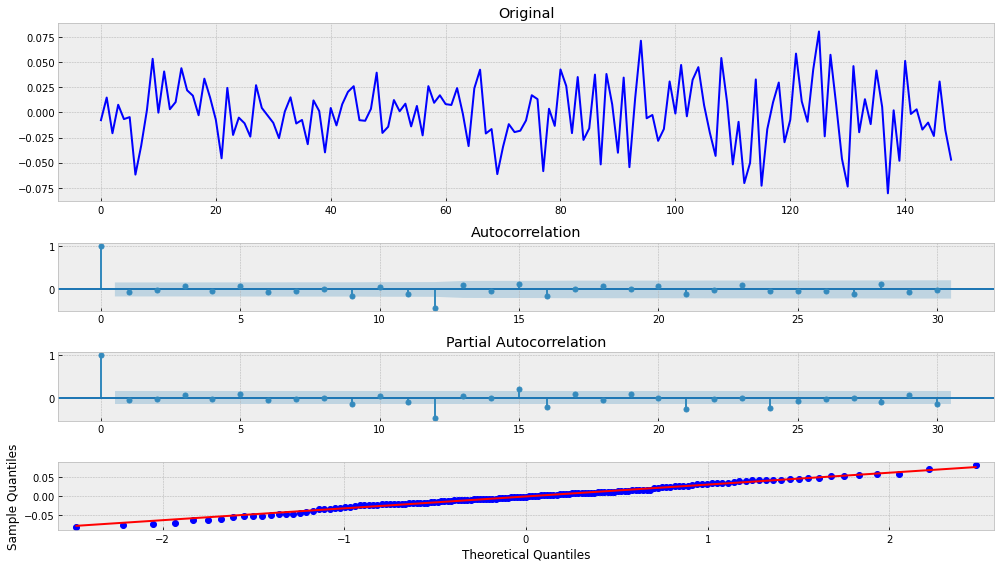

In [47]:
tsplot(series, lags=max_lag)

mdl = smt.ARIMA(series, order=(1, 1, 1)).fit(method='mle', trend='nc')
print(mdl.summary())

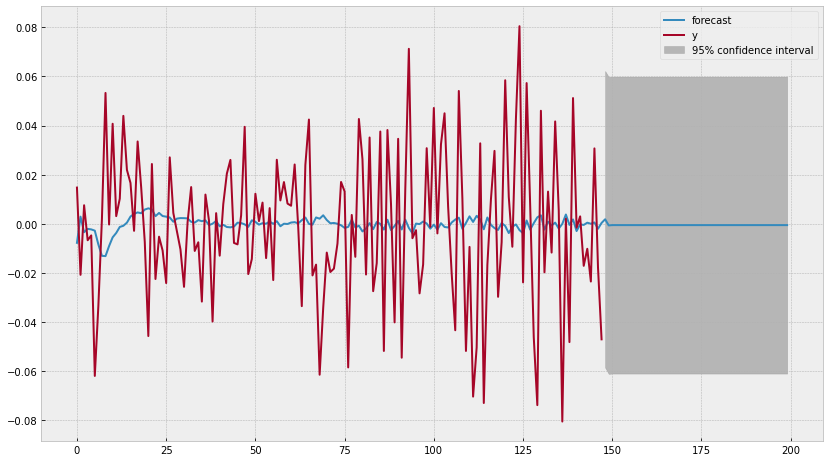

In [48]:
with plt.style.context(style='bmh'):
    plt.figure(figsize=(14,8))
    ax = plt.axes()
#     mdl.plot_predict(start=4900, end=5100, ax=ax)
    mdl.plot_predict(start=1, end=200, ax=ax)

In [249]:
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error

In [250]:
train, test, val = series[:50], series[50:60], series[60:]

In [283]:
def mse(X):
    p,d,q = X
    mdl = smt.ARIMA(series, order = X).fit(method='mle', trend='nc')
#     result = mdl(series, X)
#     predictions = result[-len(test):]
    predictions = mdl.predict(start=len(train), end=(len(train)+len(test)-1))
    error = mean_squared_error(predictions, test)
    return error

In [284]:
# series[50:60]

In [285]:
# len(train)+len(test)

In [296]:
mse([1,0,0])

0.00022125769366330346

In [255]:
# mdl = smt.ARIMA(series, order=(X)).fit(method='mle', trend='nc')

In [256]:
# mdl.predict(start=len(train), end=len(train)+len(test))

In [257]:
# print(mdl.summary())

In [258]:
# test

In [259]:
# mdl.predict(start=1, end=1000)

In [260]:
# mdl[-len(test):]

In [261]:
x0=np.array([0,0,0])

In [262]:
x0.shape

(3,)

In [299]:
opt = minimize(mse, x0=[1, 1, 1], method="L-BFGS-B", bounds = ((1, 5), (0, 5), (0, 5)))

TypeError: int() can't convert non-string with explicit base